# Pre-Processing Dataset

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# For logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Bigram TF-IDF
from sklearn.pipeline import make_pipeline

# VADER Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [6]:
# Download NLTK stuff (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/smritiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/smritiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/smritiu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Step 2: Load your dataset
df = pd.read_csv('dataset.csv')  # <- change filename if needed
df.head()

,ID,Transliterated Text,English Translation,Category,Time Period,Sentiment,Confidence Score
0,1,jr=f jry r jḥm prt-ḫrw,He has come approaching the realm of the dead...,Pyramid Texts,Old Kingdom,Positive,0.90
1,2,nb tA dsr nb ankh wAs,Lord of the Great Land lord of life and strength,Pyramid Texts,Old Kingdom,Neutral,0.88
2,3,jw Dt jm xt wn Dd=f xrw sA3 nn rsy,He is on the frightened side when his voice c...,Funerary Inscriptions,Old Kingdom,Negative,0.78
3,4,Dd mdw sw anḫ n kAw sy,Speak words to him; life is for the wise one,Wisdom Literature,Old Kingdom,Positive,0.73
4,5,kn t3 rn ḥrw psḏt=k,When your day comes death will be with you,Wisdom Literature,Old Kingdom,Negative,0.80


In [8]:
# Step 3: Check for missing values
df.isnull().sum()

ID                     0
Transliterated Text    0
English Translation    0
Category               0
Time Period            0
Sentiment              0
Confidence Score       0
dtype: int64

In [ ]:
#Cleaning the Source Text
def clean_text(text):
    text = str(text).lower()                            
    text = re.sub(r'[^a-zA-Z\s]', '', text)              
    text = re.sub(r'\s+', ' ', text).strip()            
    return text

df['cleaned_text'] = df['Category'].apply(clean_text)

In [ ]:

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['cleaned_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)


In [ ]:

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)


In [ ]:

le = LabelEncoder()
df['Sentiment_Label'] = le.fit_transform(df['Sentiment'])  # e.g. Positive → 2, Neutral → 1, Negative → 0


In [13]:
# Step 9: Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [14]:
# Preview cleaned dataset
print(df[['cleaned_text', 'Sentiment', 'Sentiment_Label']].head())

           cleaned_text  Sentiment  Sentiment_Label
0          pyramid text   Positive                2
1          pyramid text    Neutral                1
2  funerary inscription   Negative                0
3     wisdom literature   Positive                2
4     wisdom literature   Negative                0


# Naive bayes

In [ ]:
# Step 1: Import ML tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Step 2: Prepare data
X = df['cleaned_text']             # features = cleaned text
y = df['Sentiment_Label']          # labels = encoded sentiment


In [17]:
# Step 3: Split data (e.g. 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Step 4: Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
# Step 5: Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [20]:
# Step 6: Predict on test data
y_pred = nb_model.predict(X_test_vec)

In [21]:
# Step 7: Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [22]:
print("Naive Bayes Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Naive Bayes Accuracy: 0.5333333333333333

Confusion Matrix:
 [[1 2 0]
 [3 4 0]
 [0 2 3]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.25      0.33      0.29         3
     Neutral       0.50      0.57      0.53         7
    Positive       1.00      0.60      0.75         5

    accuracy                           0.53        15
   macro avg       0.58      0.50      0.52        15
weighted avg       0.62      0.53      0.56        15



In [23]:
print(X_train.dtypes)
print(X_train.head())

object
6      administrative text
41     administrative text
46          secular poetry
47    funerary inscription
15               love song
Name: cleaned_text, dtype: object


# Logistic Regression 

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')  # Replace with your filename

# Step 1: Extract features and labels
X_text = df['cleaned_text']              # this is your text column
y = df['Sentiment']                      # this is your label

# Step 2: Encode sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts to numbers (e.g., Negative=0, Neutral=1, Positive=2)

# Step 3: Convert text to TF-IDF features
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_text)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Step 5: Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.60      0.50      0.55         6
    Positive       1.00      0.67      0.80         3

    accuracy                           0.50        10
   macro avg       0.53      0.39      0.45        10
weighted avg       0.66      0.50      0.57        10



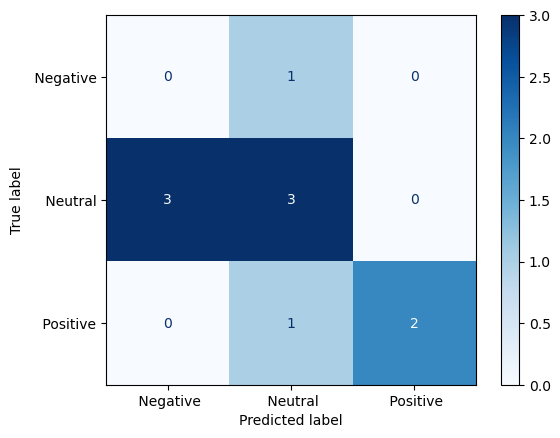

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=label_encoder.classes_, cmap='Blues')


# Bigram TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


In [27]:
# Initialize TF-IDF vectorizer for unigrams (normal words) and bigrams (pairs of words)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

# Apply TF-IDF transformation to the cleaned text
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [28]:
from scipy.sparse import hstack

# Convert Confidence Score column to 2D array
X_confidence = df['Confidence Score'].values.reshape(-1, 1)

# Combine TF-IDF matrix with Confidence Score (add confidence score to feature set)
X_combined = hstack([X_tfidf, X_confidence])


In [29]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_combined, df['Sentiment_Label'], test_size=0.3, random_state=42)

# Train Naive Bayes on the combined feature set
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate
y_pred = nb_model.predict(X_test)

# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.50      0.57      0.53         7
           2       1.00      0.60      0.75         5

    accuracy                           0.53        15
   macro avg       0.58      0.50      0.52        15
weighted avg       0.62      0.53      0.56        15



# VADER Sentiment Analysis

In [30]:
! pip install vaderSentiment


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [31]:

# Import libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load your CSV file
df = pd.read_csv('cleaned_dataset.csv')  # replace with your actual filename

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to the English text column
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(str(text))
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column for VADER prediction
df['VADER_Predicted'] = df['Category'].apply(get_vader_sentiment)

# Compare with original labels
print(df[['Category', 'Sentiment', 'VADER_Predicted']].head())


                 Category  Sentiment VADER_Predicted
0           Pyramid Texts   Positive         Neutral
1           Pyramid Texts    Neutral         Neutral
2   Funerary Inscriptions   Negative         Neutral
3       Wisdom Literature   Positive        Positive
4       Wisdom Literature   Negative        Positive
